In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# defining a function that will help us quickly calulate an average of a list
def avgOfList(list):
    return sum(list) / len(list)
# reading in the production spreadsheet
df = pd.read_csv(r'well production.csv')
# making list of well names
listOfWellNames = df['well name'].values
listOfFiles = []
# reading in spreadsheets of well data
for i in listOfWellNames:
    j = pd.read_csv((i + '.csv'))
    listOfFiles.append(j)
# creating easting and northing data to plot a map of the wells
easting = []
northing = []
for i in listOfFiles:
    easting.append(i.easting.values)
    northing.append(i.northing.values)

In [2]:
# creating lists of values from each file to color for better visualization
porosity = []
permeability = []
poissonRatio = []
youngMod = []
waterSat = []
oilSat = []
thickness = []
proppWt = []
pumpRt = []
for i in listOfFiles:
    porosity.append(i.porosity.values)
    permeability.append(i.permeability.values)
    poissonRatio.append(i["Poisson's ratio"].values)
    youngMod.append(i["Young's Modulus"].values)
    waterSat.append(i['water saturation'].values)
    oilSat.append(i['oil saturation'].values)
    thickness.append(i['thickness (ft)'].values)
    proppWt.append(i['proppant weight (lbs)'].values)
    pumpRt.append(i['pump rate (cubic feet/min)'].values)
avgOfList(porosity)

array([0.0557, 0.0573, 0.0558, 0.0585, 0.0572, 0.0558, 0.0555, 0.0565,
       0.0562, 0.0564, 0.0548, 0.0559, 0.0543, 0.0573, 0.0585, 0.0611,
       0.0577, 0.0587, 0.0561, 0.0549, 0.0552, 0.0567, 0.055 , 0.0566,
       0.0548, 0.0557, 0.0546, 0.0565, 0.0555, 0.0565, 0.0575, 0.0578,
       0.0573, 0.0577, 0.0574, 0.0563, 0.0594, 0.0577, 0.0571, 0.0545,
       0.055 , 0.058 , 0.0562, 0.0563, 0.0536, 0.0527, 0.0559, 0.0559,
       0.0572, 0.0553, 0.0545, 0.0567, 0.0572, 0.0572, 0.0546, 0.0551,
       0.056 , 0.0574, 0.0554, 0.0555, 0.0574, 0.0559, 0.0549, 0.0565,
       0.0548, 0.0546, 0.0564, 0.0571, 0.0575, 0.0565, 0.0567, 0.0564,
       0.055 , 0.0537, 0.0561, 0.0582, 0.0573, 0.0557, 0.0553, 0.0565,
       0.0582, 0.058 , 0.0577, 0.0567, 0.0574, 0.0579, 0.0569, 0.0561,
       0.0559, 0.0563, 0.0545, 0.0566, 0.0556, 0.0562, 0.0554, 0.055 ,
       0.0575, 0.0544, 0.0549, 0.0552])

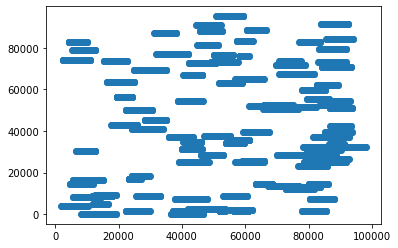

In [3]:
# map of wells
plt.scatter(easting, northing)

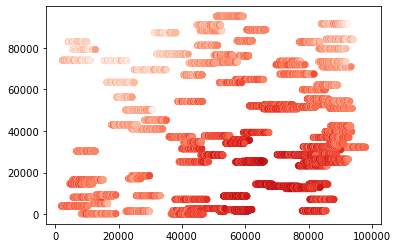

In [4]:
# map of wells colored by porosity
# high porosity at (70, 10)
plt.scatter(easting, northing, c = porosity,cmap="Reds")

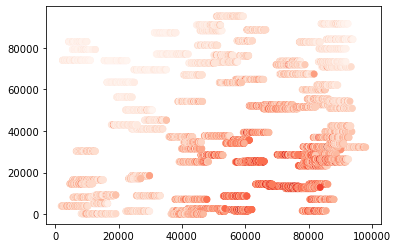

In [5]:
# map of wells colored by permeability
# looks uniform
plt.scatter(easting, northing, c = permeability, cmap = "Reds")

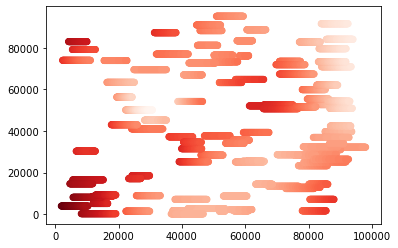

In [6]:
# map of wells colored by PR
plt.scatter(easting, northing, c = poissonRatio, cmap = "Reds")

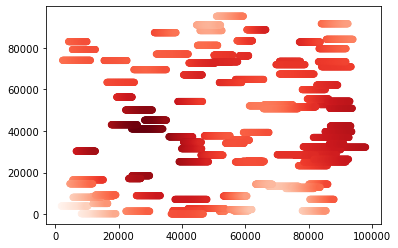

In [7]:
# map of wells colored by YM
plt.scatter(easting, northing, c = youngMod, cmap = "Reds")

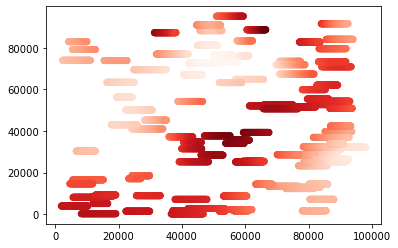

In [8]:
# map of wells colored by water saturation
plt.scatter(easting, northing, c = waterSat, cmap = "Reds")

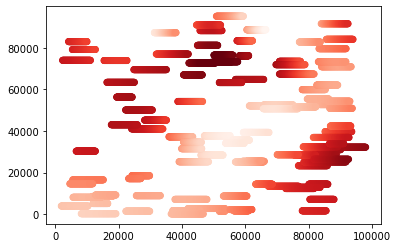

In [9]:
# map of wells colored by oil saturation
# hotspot for oil at (90, 30) and (50,70)
plt.scatter(easting, northing, c = oilSat, cmap = "Reds")

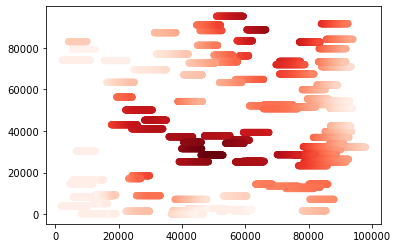

In [10]:
# map of wells colored by thickness
# thicker toward center of reservoir
plt.scatter(easting, northing, c = thickness, cmap = "Reds")

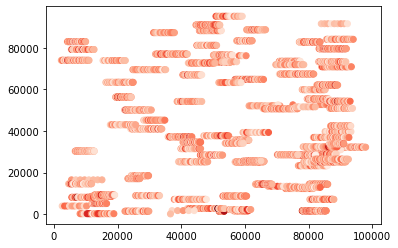

In [11]:
# map of wells colored by proppant rate
# looks uniform
plt.scatter(easting, northing, c = proppWt, cmap = "Reds")

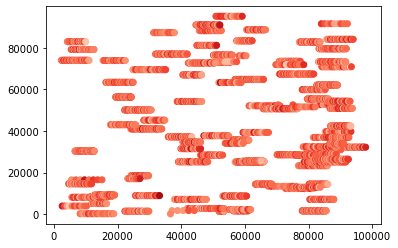

In [12]:
# map of wells colored by pump rate
# looks uniform
plt.scatter(easting, northing, c = pumpRt, cmap = "Reds")

In [13]:
# calculating original oil in place
porAvgs = avgOfList(porosity)
oilSatAvgs = avgOfList(oilSat)
AREA = (2 * 59239.73 * 42618) / 43560
avgThickness = avgOfList(avgOfList(thickness))
factor = (AREA * avgThickness * 7758) / 1.6
OOIP = []
for poravg in porAvgs:
    for oilsatavg in oilSatAvgs:
        ooip = poravg * oilsatavg * factor
    OOIP.append(ooip)

In [14]:
#calculating average recoverable reserves for each well
i = 0
RR = []
while i < 100:
    rr = OOIP[i] * df['recovery factor'][i]
    RR.append(rr)
    i += 1

In [15]:
# average overall recoverable reserves
100 * avgOfList(RR)

12680320877.641693

In [16]:
avgOfList(porAvgs) * avgOfList(oilSatAvgs) * factor * avgOfList(df['recovery factor'].values)

126563416.6603315

In [17]:
avgOfList(porAvgs) * avgOfList(oilSatAvgs) * factor

1333635989.928023

In [18]:
diffInOOIPandRR = 1333635989.928023 - 126563416.6603315
diffInOOIPandRR

1207072573.2676916

In [19]:
RRave = avgOfList(df['recovery factor'].values)
RRave

0.09490102068043484

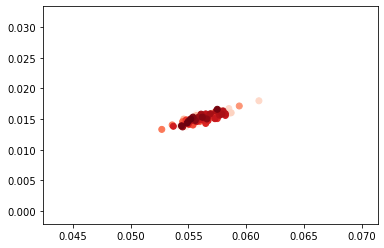

In [20]:
plt.scatter(avgOfList(porosity), avgOfList(permeability), c = avgOfList(easting), cmap = "Reds")